In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
# clustering
from sklearn.cluster import KMeans

In [17]:
df=pd.read_csv("C:/Users/athul/Downloads/Student_Marks.csv")

In [18]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [6]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [1]:
sc=StandardScaler()

NameError: name 'StandardScaler' is not defined

In [21]:
for i in df.columns:
    df[i]=sc.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df[i]

0    -0.365901
1    -1.170425
2    -0.744100
3     2.006422
4     2.166442
        ...   
95   -0.371092
96   -1.319502
97    1.194461
98   -0.869254
99    0.556973
Name: Marks, Length: 100, dtype: float64

In [24]:
df

,number_courses,time_study,Marks
0,-1.278970,0.182489,-0.365901
1,-0.720468,-1.686195,-1.170425
2,-0.720468,-0.399887,-0.744100
3,0.396537,1.622968,2.006422
4,1.513541,1.581461,2.166442
...,...,...,...
95,0.396537,-0.218609,-0.371092
96,-1.278970,-1.599368,-1.319502
97,-0.720468,1.307003,1.194461
98,0.955039,-1.595980,-0.869254


In [28]:
km=KMeans(n_clusters=2,random_state=42)

In [29]:
df['Cluster']=km.fit_predict(df)

C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
df

,number_courses,time_study,Marks,Cluster
0,-1.278970,0.182489,-0.365901,1
1,-0.720468,-1.686195,-1.170425,1
2,-0.720468,-0.399887,-0.744100,1
3,0.396537,1.622968,2.006422,0
4,1.513541,1.581461,2.166442,0
...,...,...,...,...
95,0.396537,-0.218609,-0.371092,1
96,-1.278970,-1.599368,-1.319502,1
97,-0.720468,1.307003,1.194461,0
98,0.955039,-1.595980,-0.869254,1


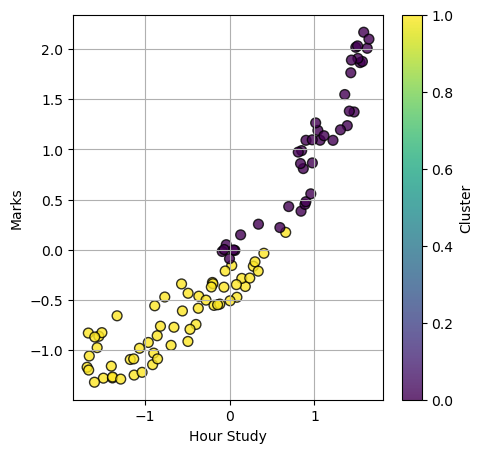

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(df['time_study'],df['Marks'],c=df['Cluster'],cmap='viridis',s=50,alpha=0.8,edgecolors='k')
plt.xlabel('Hour Study')
plt.ylabel('Marks')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()